In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [157]:
data = pd.read_csv('Drug_Consumption.csv')

In [158]:
alc = data['Alcohol']
cl0 = 0
cl1 = 0
cl2 = 0
cl3 = 0
cl4 = 0
cl5 = 0
cl6 = 0

for i,j in data.iterrows():
    if alc[i] == 'CL0':
        cl0 = cl0 + 1
    if alc[i] == 'CL1':
        cl1 = cl1 + 1
    if alc[i] == 'CL2':
        cl2 = cl2 + 1
    if alc[i] == 'CL3':
        cl3 = cl3 + 1
    if alc[i] == 'CL4':
        cl4 = cl4 + 1
    if alc[i] == 'CL5':
        cl5 = cl5 + 1
    if alc[i] == 'CL6':
        cl6 = cl6 + 1


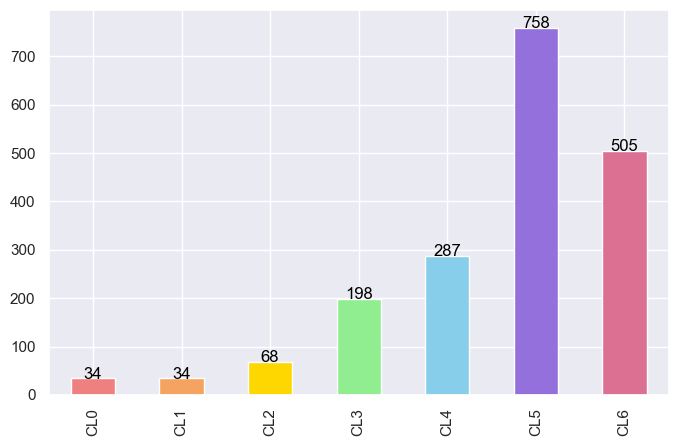

In [159]:
alc_data = {'CL0': [0], 'CL1': [0], 'CL2': [0], 'CL3': [0], 'CL4': [0], 'CL5': [0], 'CL6': [0]}
alc_df = pd.DataFrame(alc_data)

alc_df['CL0'] = cl0
alc_df['CL1'] = cl1
alc_df['CL2'] = cl2
alc_df['CL3'] = cl3
alc_df['CL4'] = cl4
alc_df['CL5'] = cl5
alc_df['CL6'] = cl6

colors = ['lightcoral', 'sandybrown', 'gold', 'lightgreen', 'skyblue', 'mediumpurple', 'palevioletred']

graph = alc_df.sum().plot(kind='bar', figsize=(8, 5), color=colors)
for i, v in enumerate(alc_df.sum()):
    graph.text(i, v + 0.1, str(v), color='black', ha='center')
plt.show()


In [160]:
def visualize_data(col):
    drug = data[col]
    cl0 = 0
    cl1 = 0
    cl2 = 0
    cl3 = 0
    cl4 = 0
    cl5 = 0
    cl6 = 0

    for i,j in data.iterrows():
        if drug[i] == 'CL0':
            cl0 = cl0 + 1
        if drug[i] == 'CL1':
            cl1 = cl1 + 1
        if drug[i] == 'CL2':
            cl2 = cl2 + 1
        if drug[i] == 'CL3':
            cl3 = cl3 + 1
        if drug[i] == 'CL4':
            cl4 = cl4 + 1
        if drug[i] == 'CL5':
            cl5 = cl5 + 1
        if drug[i] == 'CL6':
            cl6 = cl6 + 1
    drug_data = {'CL0': [0], 'CL1': [0], 'CL2': [0], 'CL3': [0], 'CL4': [0], 'CL5': [0], 'CL6': [0]}
    drug_df = pd.DataFrame(drug_data)

    drug_df['CL0'] = cl0
    drug_df['CL1'] = cl1
    drug_df['CL2'] = cl2
    drug_df['CL3'] = cl3
    drug_df['CL4'] = cl4
    drug_df['CL5'] = cl5
    drug_df['CL6'] = cl6

    colors = ['maroon', 'indigo', 'darkslategrey', 'darkblue', 'darkcyan', 'darkgreen', 'darkmagenta']
        # Create a white background for the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    fig.set_facecolor('white')
    ax.set_facecolor('white')


    graph = drug_df.sum().plot(kind='bar', figsize=(8, 5), color=colors)
    plt.title(col)  # Add a title here
    plt.xlabel('Classes')
    plt.ylabel('Count')
    graph.set_xticklabels(graph.get_xticklabels(), rotation=0)

    for i, v in enumerate(drug_df.sum()):
        graph.text(i, v + 0.5, str(v), color='black', ha='center')
    plt.show()


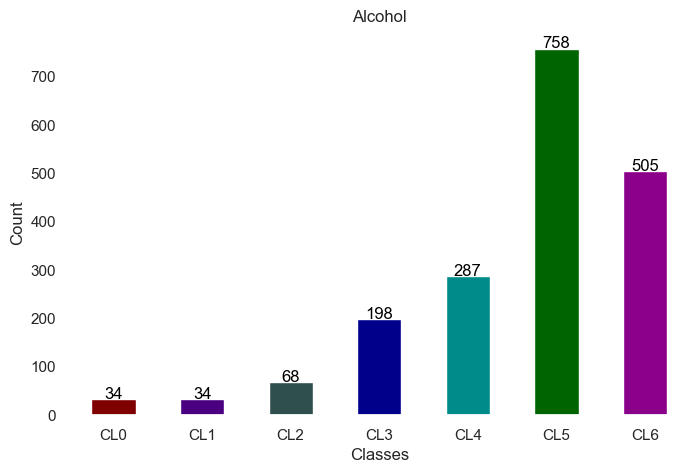

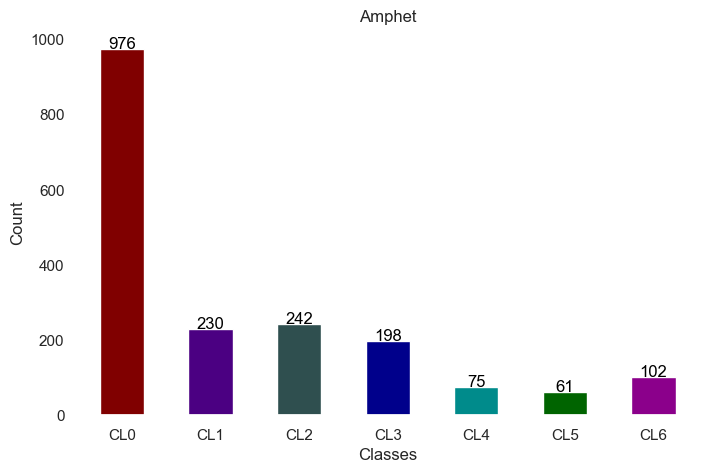

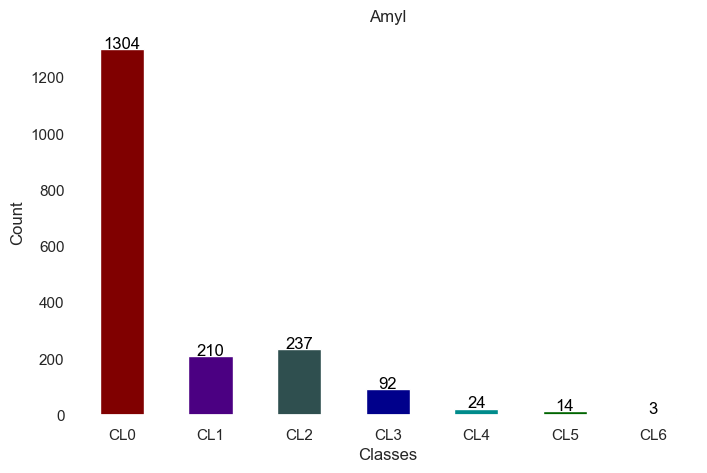

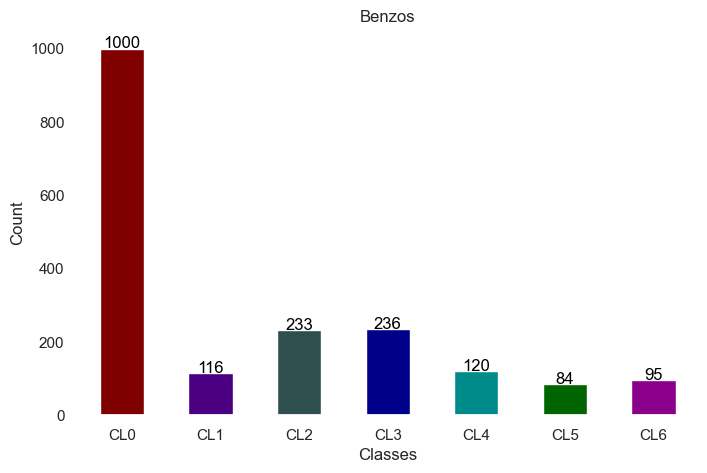

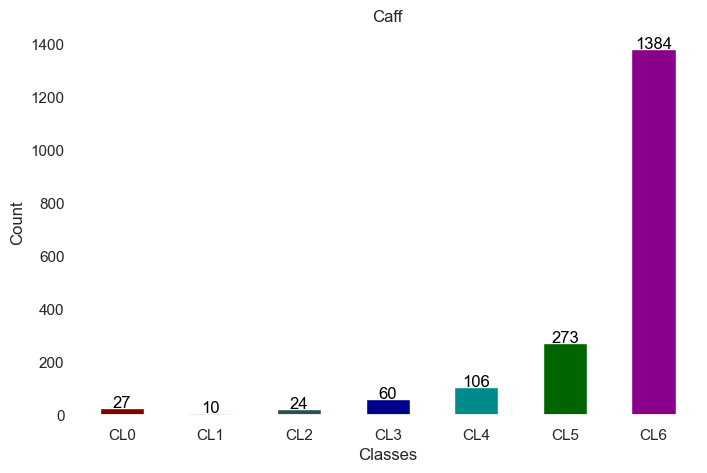

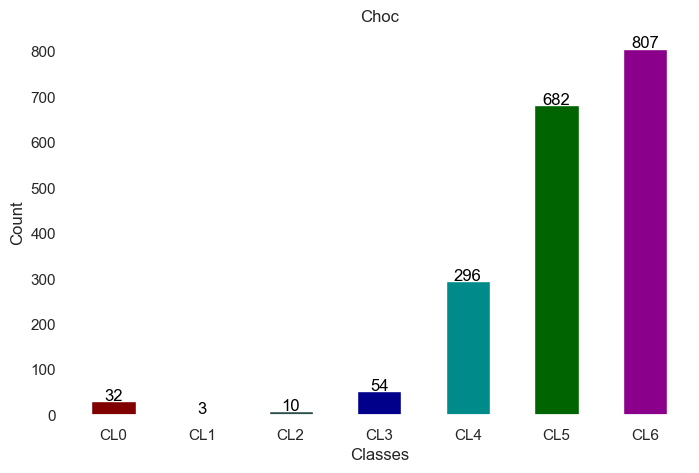

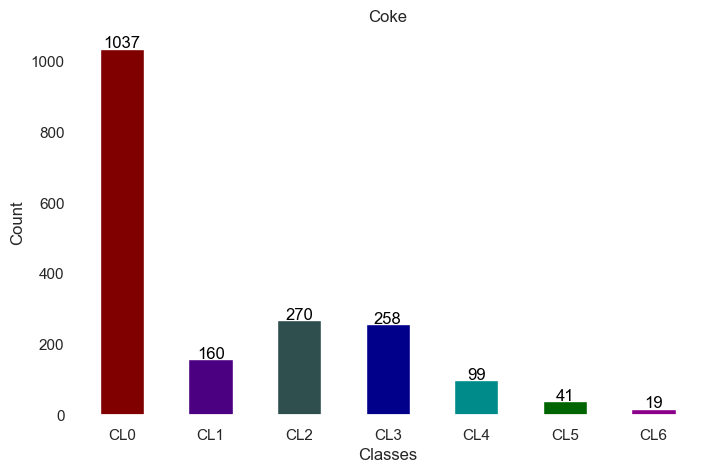

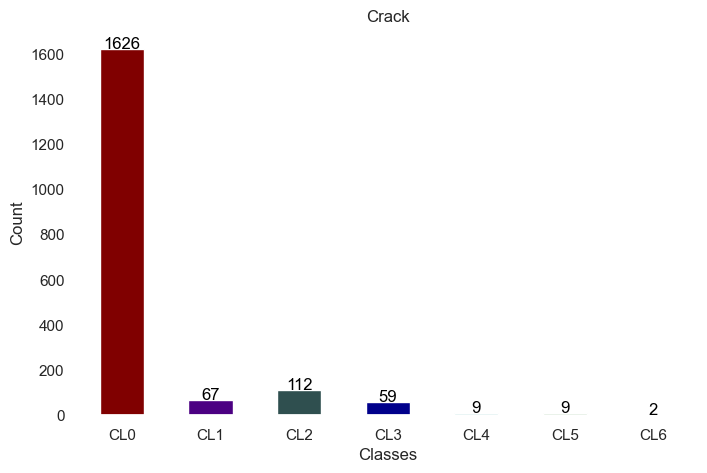

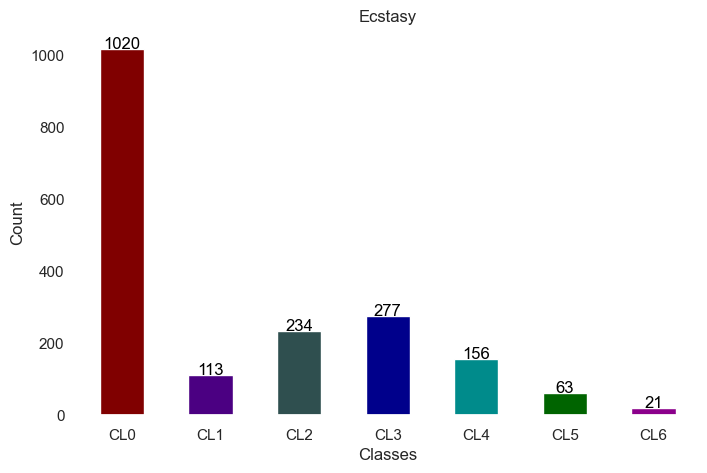

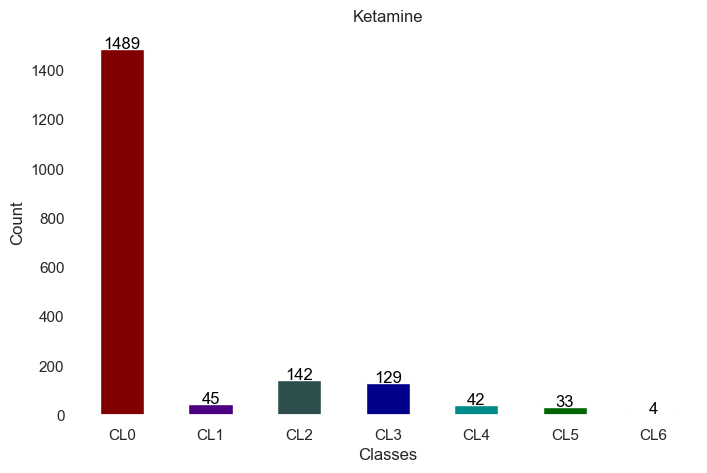

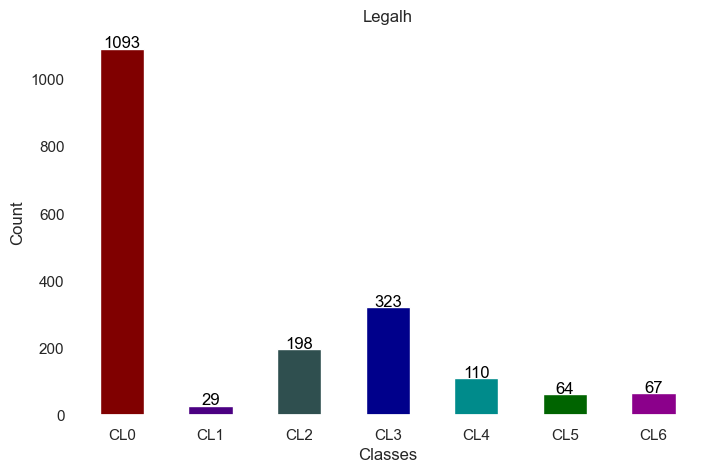

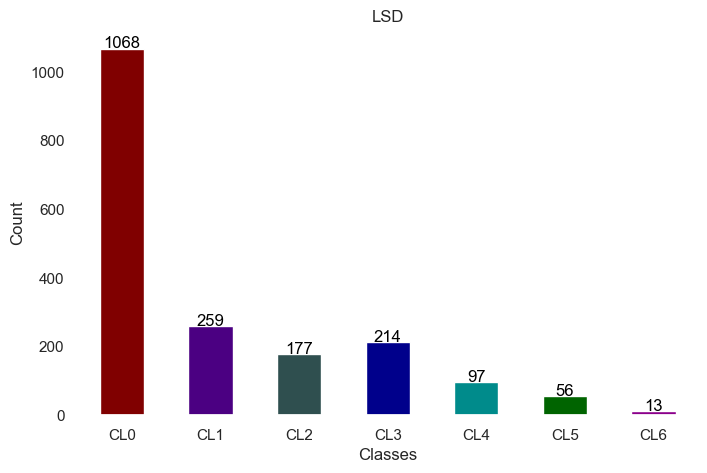

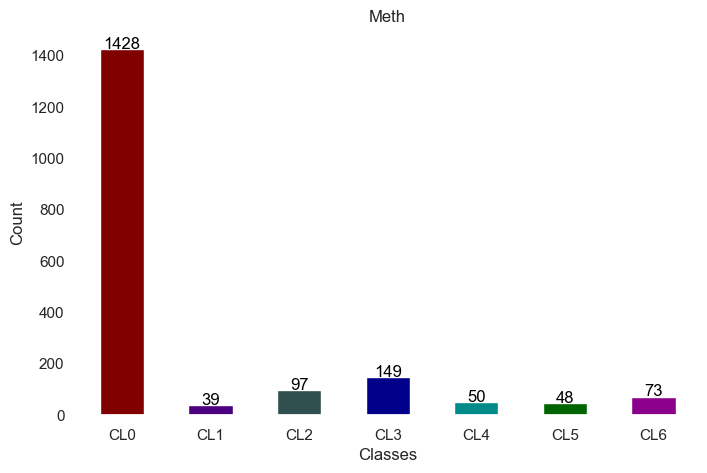

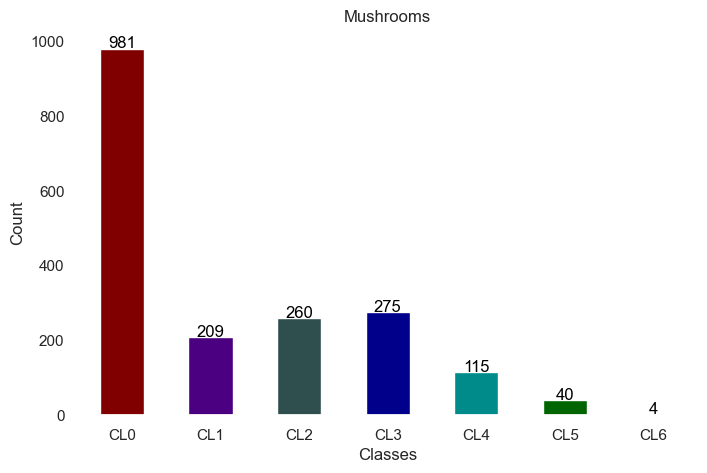

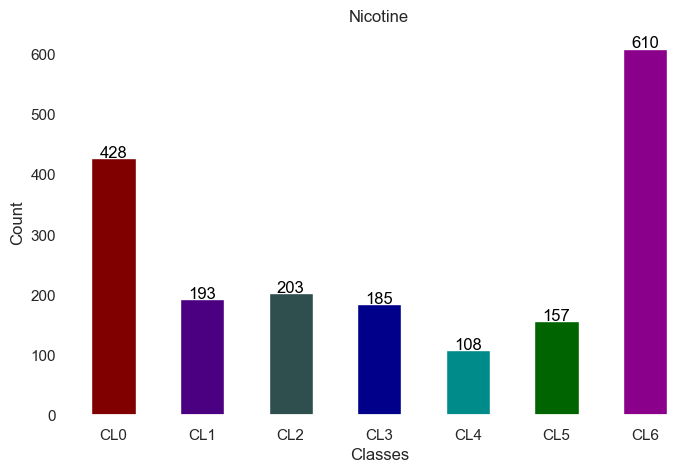

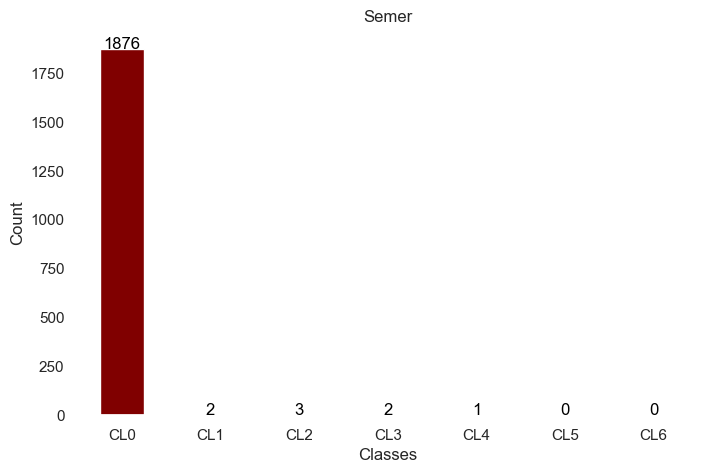

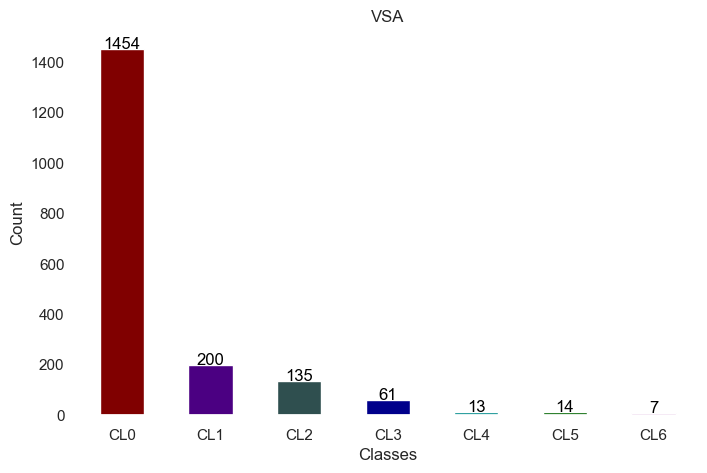

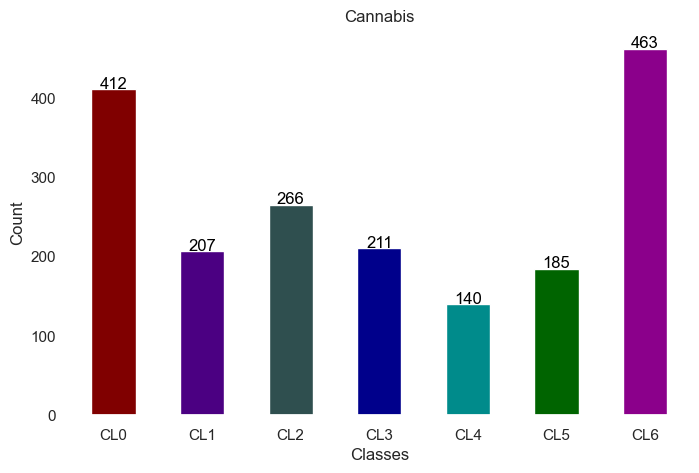

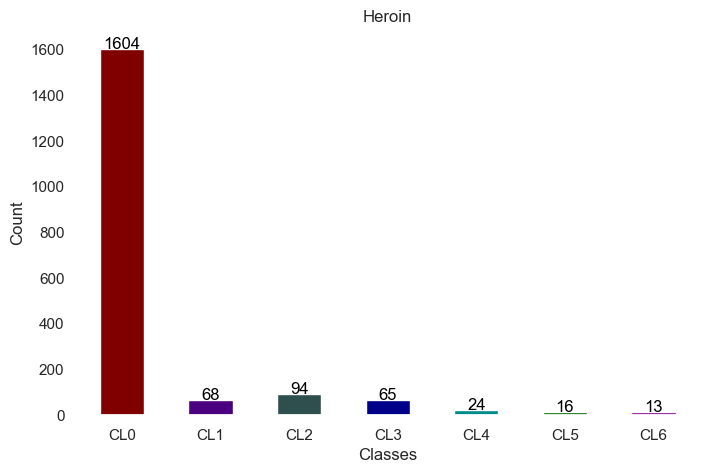

In [161]:
visualize_data('Alcohol')
visualize_data('Amphet')
visualize_data('Amyl')
visualize_data('Benzos')
visualize_data('Caff')
visualize_data('Choc')
visualize_data('Coke')
visualize_data('Crack')
visualize_data('Ecstasy')
visualize_data('Ketamine')
visualize_data('Legalh')
visualize_data('LSD')
visualize_data('Meth')
visualize_data('Mushrooms')
visualize_data('Nicotine')
visualize_data('Semer')
visualize_data('VSA')
visualize_data('Cannabis')
visualize_data('Heroin')

In [162]:
# replace class names with integers
data = data.replace({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})


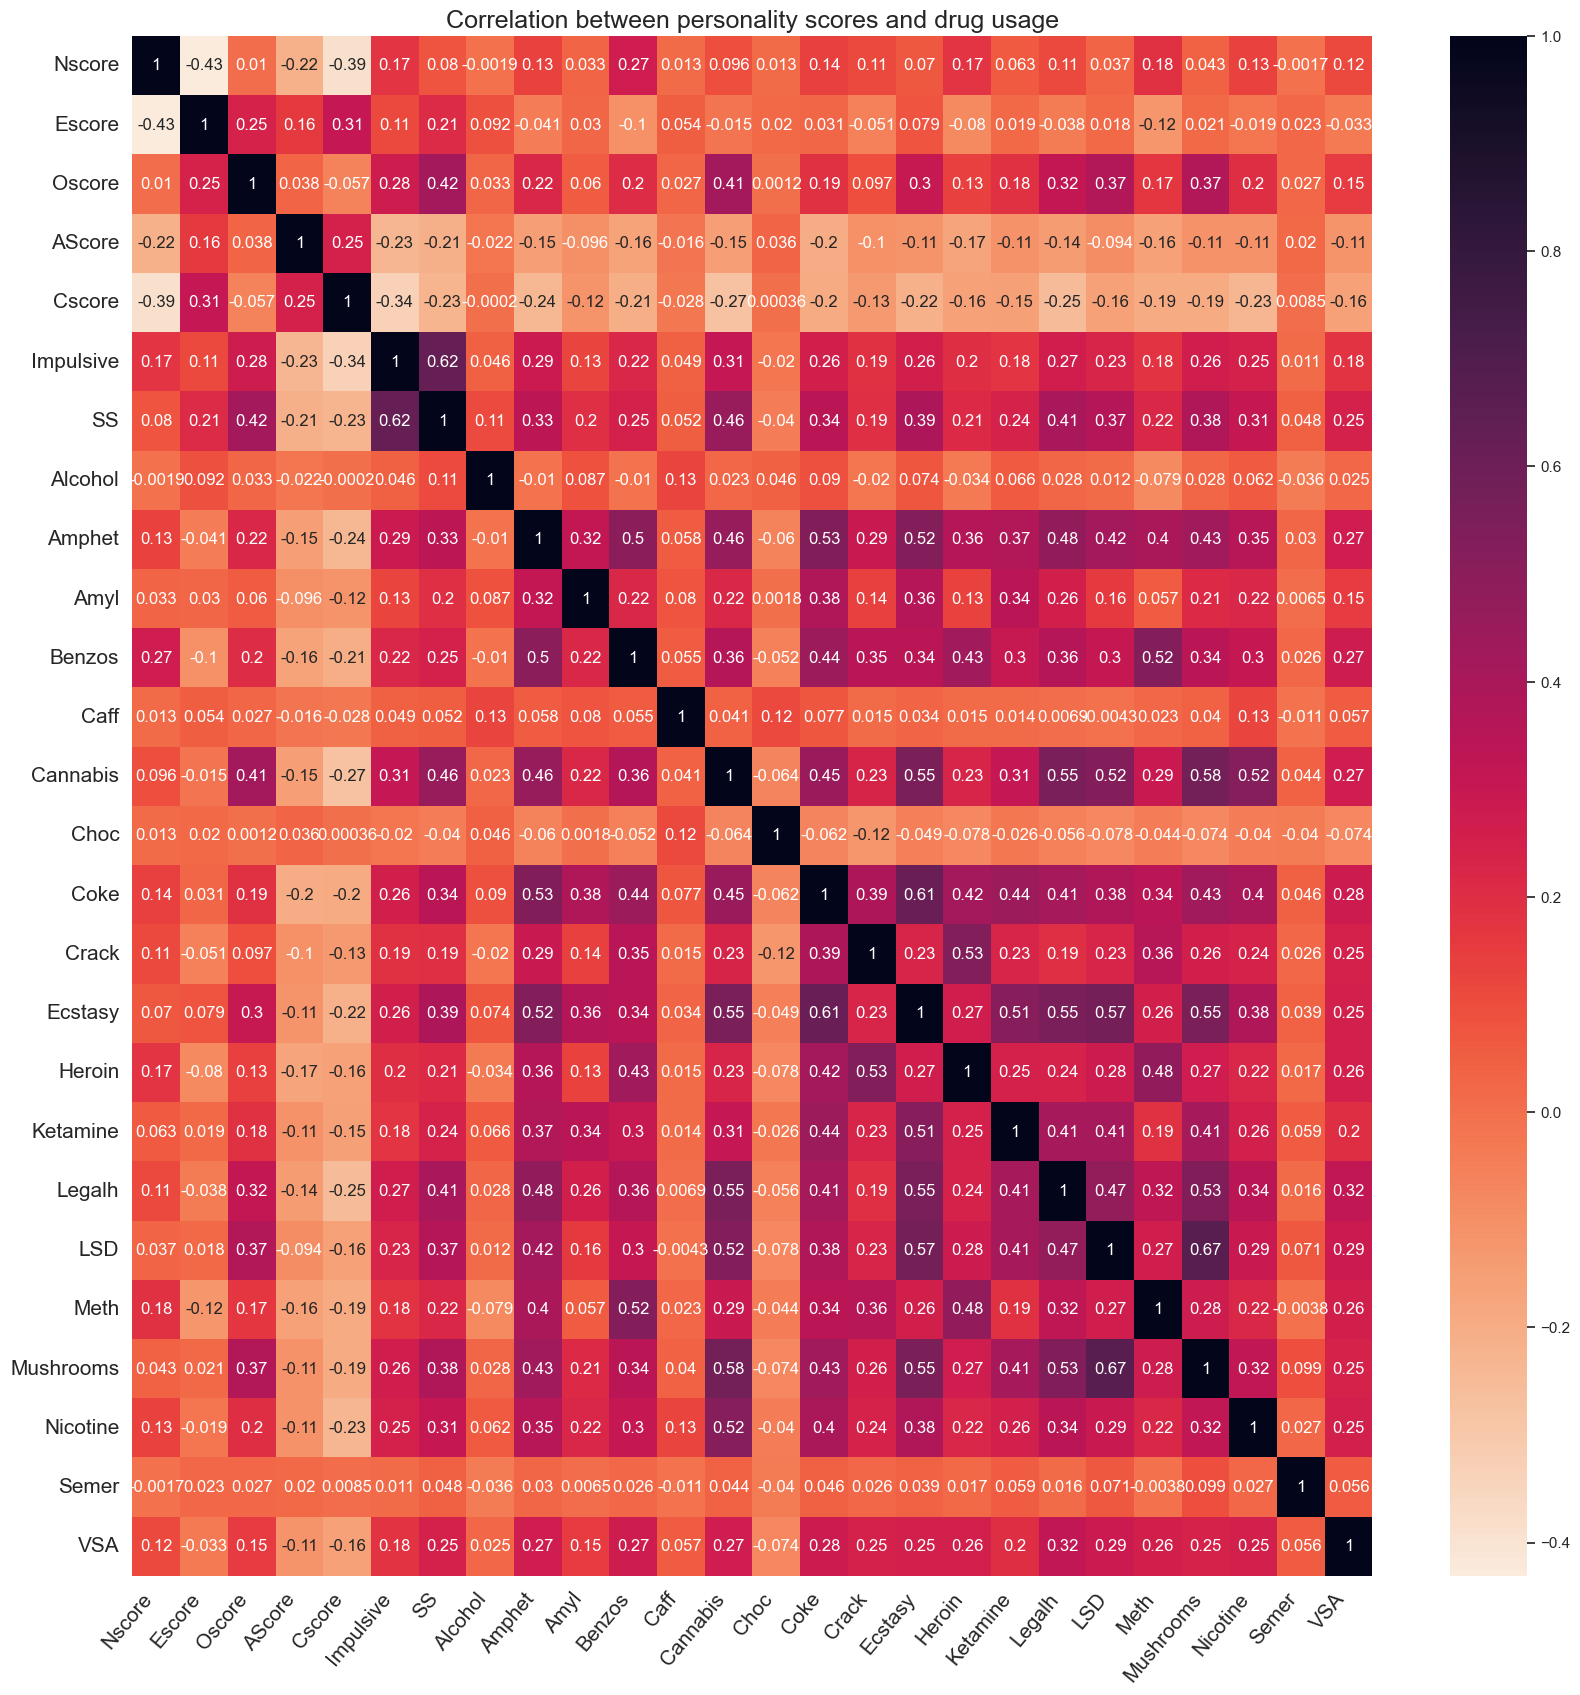

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# start heatmap from nscore column
start_column = 'Nscore'
selected_columns = data.columns[data.columns.get_loc(start_column):]

# correlation matrix for the selected columns
corrmat_subset = data[selected_columns].corr()

# matplotlib figure
plt.figure(figsize=(20, 20))

# create a heatmap 
hm = sns.heatmap(corrmat_subset, cmap='rocket_r', annot=True,
                 yticklabels=selected_columns, xticklabels=selected_columns)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=50, ha='right')
plt.title(f"Correlation between personality scores and drug usage", fontsize=18)

plt.show()


In [172]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Drug_Consumption.csv')

# Separate features (X) and target variable (y)
X = data[['Oscore', 'Cscore', 'Escore', 'AScore', 'Nscore']]
y = data['Alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SMOTE algorithm
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now X_resampled and y_resampled contain the resampled data
# Use these in your machine learning model training

# Optionally, you can check the class distribution after resampling
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
CL5    604
CL6    604
CL3    604
CL4    604
CL1    604
CL2    604
CL0    604
Name: Alcohol, dtype: int64


In [173]:
data['Alcohol_User'] = 0
data['Amyl_User'] = 0
data['Benzos_User'] = 0
data['Cannabis_User'] = 0
data['Coke_User'] = 0
data['Crack_User'] = 0
data['Ecstasy_User'] = 0
data['Heroin_User'] = 0
data['Ketamine_User'] = 0
data['Legalh_User'] = 0
data['LSD_User'] = 0
data['Meth_User'] = 0
data['Mushrooms_User'] = 0
data['Nicotine_User'] = 0



In [174]:
for (i, col) in enumerate(data['Alcohol']):
    if col == 'CL0':
        data.loc[i, 'Alcohol_User'] = 'N'
    elif col == 'CL1':
        data.loc[i, 'Alcohol_User'] = 'N'
    elif col == 'CL2':
        data.loc[i, 'Alcohol_User'] = 'N'
    elif col == 'CL3':
        data.loc[i, 'Alcohol_User'] = 'Y'
    elif col == 'CL4':
        data.loc[i, 'Alcohol_User'] = 'Y'
    elif col == 'CL5':
        data.loc[i, 'Alcohol_User'] = 'Y'
    elif col == 'CL6':
        data.loc[i, 'Alcohol_User'] = 'Y'


In [175]:
def user_classif(drugname, colname):
    for (i, col) in enumerate(data[drugname]):
        if col == 'CL0':
            data.loc[i, colname] = 'N'
        elif col == 'CL1':
            data.loc[i, colname] = 'N'
        elif col == 'CL2':
            data.loc[i, colname] = 'N'
        elif col == 'CL3':
            data.loc[i, colname] = 'Y'
        elif col == 'CL4':
            data.loc[i, colname] = 'Y'
        elif col == 'CL5':
            data.loc[i, colname] = 'Y'
        elif col == 'CL6':
            data.loc[i, colname] = 'Y'


In [176]:
user_classif('Amyl', 'Amyl_User')
user_classif('Benzos', 'Benzos_User')
user_classif('Cannabis', 'Cannabis_User')
user_classif('Coke', 'Coke_User')
user_classif('Crack', 'Crack_User')
user_classif('Ecstasy', 'Ecstasy_User')
user_classif('Heroin', 'Heroin_User')
user_classif('Ketamine', 'Ketamine_User')
user_classif('Legalh', 'Legalh_User')
user_classif('LSD', 'LSD_User')
user_classif('Meth', 'Meth_User')
user_classif('Mushrooms', 'Mushrooms_User')
user_classif('Nicotine', 'Nicotine_User')


In [177]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Coke_User,Crack_User,Ecstasy_User,Heroin_User,Ketamine_User,Legalh_User,LSD_User,Meth_User,Mushrooms_User,Nicotine_User
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Y,N,Y,N,N,N,N,Y,N,Y
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,N,N,N,N,N,N,N,N,N,N
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,N,N,N,N,N,N,N,N,N,N
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,N,N,N,N,N,N,N,N,N,N
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,N,N,N,N,N,N,N,N,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,N,N,N,N,N,Y,Y,N,N,N
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,N,N,N,N,N,Y,Y,Y,Y,Y
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,Y,N,Y,N,N,N,N,N,N,Y
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,N,N,Y,N,N,Y,Y,N,Y,Y


In [178]:
data.to_csv('User2.csv', index=False)

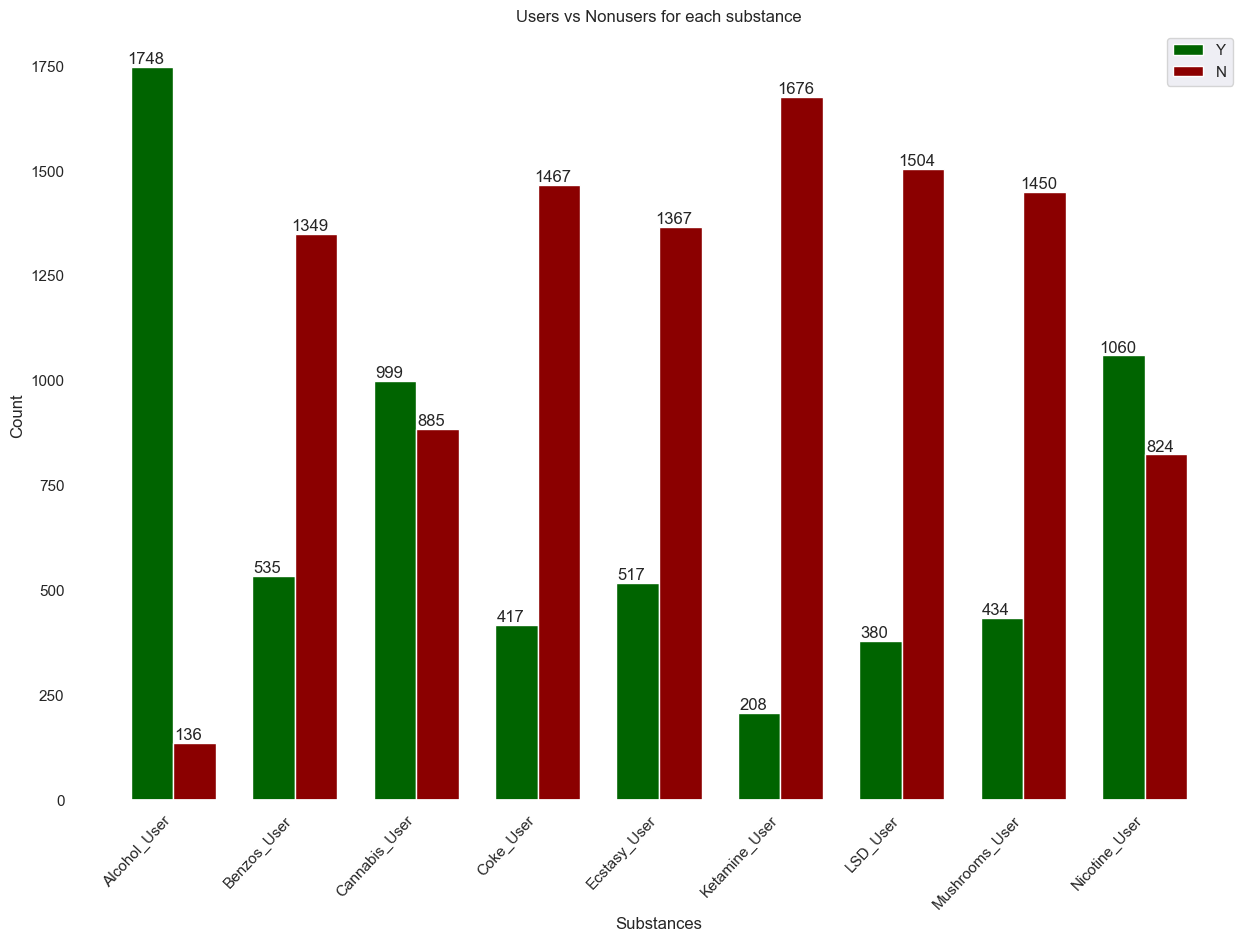

In [184]:


# Specify the columns for which you want counts
selected_columns = ['Alcohol_User', 'Benzos_User', 'Cannabis_User', 'Coke_User',
                    'Ecstasy_User', 'Ketamine_User', 'LSD_User',
                   'Mushrooms_User', 'Nicotine_User']


fig, ax = plt.subplots(figsize=(15, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')


# Get the total counts of 'Y' and 'N' for the selected columns
counts = data[selected_columns].apply(lambda x: x.value_counts())

# Plot grouped bar graph
bar_width = 0.35
index = np.arange(len(selected_columns))

bars_y = plt.bar(index - bar_width/2, counts.loc['Y'], width=bar_width, label='Y', color='darkgreen')
bars_n = plt.bar(index + bar_width/2, counts.loc['N'], width=bar_width, label='N', color='darkred')

# Annotate bars with number labels
for bar, label in zip(bars_y, counts.loc['Y']):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.05, str(label), ha='center', va='bottom')

for bar, label in zip(bars_n, counts.loc['N']):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.05, str(label), ha='center', va='bottom')

# Labeling and styling
plt.xlabel('Substances')
plt.ylabel('Count')
plt.title('Users vs Nonusers for each substance')
plt.xticks(index, selected_columns, rotation=47, ha='right')
plt.legend()


# Show the plot
plt.show()


In [169]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Coke_User,Crack_User,Ecstasy_User,Heroin_User,Ketamine_User,Legalh_User,LSD_User,Meth_User,Mushrooms_User,Nicotine_User
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,0,0,0,0,0,0,0,0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,0,0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,0,0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,0,0,0,0,0,0,0
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,0,0,0,0,0,0,0,0,0,0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,0,0,0,0,0,0,0,0,0,0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Calculate mean, median, and std for 'Y' in Alcohol_User
mean_y = data[data['Alcohol_User'] == 'Y']['Oscore'].mean()
median_y = data[data['Alcohol_User'] == 'Y']['Oscore'].median()
std_y = data[data['Alcohol_User'] == 'Y']['Oscore'].std()

# Calculate mean, median, and std for 'N' in Alcohol_User
mean_n = data[data['Alcohol_User'] == 'N']['Oscore'].mean()
median_n = data[data['Alcohol_User'] == 'N']['Oscore'].median()
std_n = data[data['Alcohol_User'] == 'N']['Oscore'].std()

# Print the results
print(f"Mean for 'Y': {mean_y}")
print(f"Median for 'Y': {median_y}")
print(f"Standard deviation for 'Y': {std_y}")

print(f"\nMean for 'N': {mean_n}")
print(f"Median for 'N': {median_n}")
print(f"Standard deviation for 'N': {std_n}")

Mean for 'Y': 0.021298896774193565
Median for 'Y': -0.01928
Standard deviation for 'Y': 0.9916066910567373

Mean for 'N': -0.10011173652694609
Median for 'N': -0.17779
Standard deviation for 'N': 1.0138959570453423


In [90]:
def get_stats(col_name):    

    o_mean_y = data[data[col_name] == 'Y']['Oscore'].mean()
    o_median_y = data[data[col_name] == 'Y']['Oscore'].median()
    o_std_y = data[data[col_name] == 'Y']['Oscore'].std()
    o_mean_n = data[data[col_name] == 'N']['Oscore'].mean()
    o_median_n = data[data[col_name] == 'N']['Oscore'].median()
    o_std_n = data[data[col_name] == 'N']['Oscore'].std()
    
    c_mean_y = data[data[col_name] == 'Y']['Cscore'].mean()
    c_median_y = data[data[col_name] == 'Y']['Cscore'].median()
    c_std_y = data[data[col_name] == 'Y']['Cscore'].std()
    c_mean_n = data[data[col_name] == 'N']['Cscore'].mean()
    c_median_n = data[data[col_name] == 'N']['Cscore'].median()
    c_std_n = data[data[col_name] == 'N']['Cscore'].std()
    
    e_mean_y = data[data[col_name] == 'Y']['Escore'].mean()
    e_median_y = data[data[col_name] == 'Y']['Escore'].median()
    e_std_y = data[data[col_name] == 'Y']['Escore'].std()
    e_mean_n = data[data[col_name] == 'N']['Escore'].mean()
    e_median_n = data[data[col_name] == 'N']['Escore'].median()
    e_std_n = data[data[col_name] == 'N']['Escore'].std()

    a_mean_y = data[data[col_name] == 'Y']['AScore'].mean()
    a_median_y = data[data[col_name] == 'Y']['AScore'].median()
    a_std_y = data[data[col_name] == 'Y']['AScore'].std()
    a_mean_n = data[data[col_name] == 'N']['AScore'].mean()
    a_median_n = data[data[col_name] == 'N']['AScore'].median()
    a_std_n = data[data[col_name] == 'N']['AScore'].std()

    n_mean_y = data[data[col_name] == 'Y']['Nscore'].mean()
    n_median_y = data[data[col_name] == 'Y']['Nscore'].median()
    n_std_y = data[data[col_name] == 'Y']['Nscore'].std()
    n_mean_n = data[data[col_name] == 'N']['Nscore'].mean()
    n_median_n = data[data[col_name] == 'N']['Nscore'].median()
    n_std_n = data[data[col_name] == 'N']['Nscore'].std()
    
    i_mean_y = data[data[col_name] == 'Y']['Impulsive'].mean()
    i_median_y = data[data[col_name] == 'Y']['Impulsive'].median()
    i_std_y = data[data[col_name] == 'Y']['Impulsive'].std()
    i_mean_n = data[data[col_name] == 'N']['Impulsive'].mean()
    i_median_n = data[data[col_name] == 'N']['Impulsive'].median()
    i_std_n = data[data[col_name] == 'N']['Impulsive'].std()
    
    ss_mean_y = data[data[col_name] == 'Y']['SS'].mean()
    ss_median_y = data[data[col_name] == 'Y']['SS'].median()
    ss_std_y = data[data[col_name] == 'Y']['SS'].std()
    ss_mean_n = data[data[col_name] == 'N']['SS'].mean()
    ss_median_n = data[data[col_name] == 'N']['SS'].median()
    ss_std_n = data[data[col_name] == 'N']['SS'].std()

    # Print the results
    print('Oscore mean for users:', o_mean_y)
    print('Oscore median for users:', o_median_y)
    print('Oscore std for users:', o_std_n)
    print('Oscore mean for nonusers:', o_mean_n)
    print('Oscore median for nonusers:', o_median_n)
    print('Oscore std for nonusers:', o_std_n)
    
    print('Cscore mean for users:', c_mean_y)
    print('Cscore median for users:', c_median_y)
    print('Cscore std for users:', c_std_n)
    print('Cscore mean for nonusers:', c_mean_n)
    print('Cscore median for nonusers:', c_median_n)
    print('Cscore std for nonusers:', c_std_n)
    
    print('Escore mean for users:', e_mean_y)
    print('Escore median for users:', e_median_y)
    print('Escore std for users:', e_std_n)
    print('Escore mean for nonusers:', e_mean_n)
    print('Escore median for nonusers:', e_median_n)
    print('Escore std for nonusers:', e_std_n)
    
    print('Ascore mean for users:', a_mean_y)
    print('Ascore median for users:', a_median_y)
    print('Ascore std for users:', a_std_n)
    print('Ascore mean for nonusers:', a_mean_n)
    print('Ascore median for nonusers:', a_median_n)
    print('Ascore std for nonusers:', a_std_n)
    
    print('Nscore mean for users:', n_mean_y)
    print('Nscore median for users:', n_median_y)
    print('Nscore std for users:', n_std_n)
    print('Nscore mean for nonusers:', n_mean_n)
    print('Nscore median for nonusers:', n_median_n)
    print('Nscore std for nonusers:', n_std_n)
    
    print('Impulsive mean for users:', i_mean_y)
    print('Impulsive median for users:', i_median_y)
    print('Impulsive std for users:', i_std_n)
    print('Impulsive mean for nonusers:', i_mean_n)
    print('Impulsive median for nonusers:', i_median_n)
    print('Impulsive std for nonusers:', i_std_n)
    
    print('SS mean for users:', ss_mean_y)
    print('SS median for users:', ss_median_y)
    print('SS std for users:', ss_std_n)
    print('SS mean for nonusers:', ss_mean_n)
    print('SS median for nonusers:', ss_median_n)
    print('SS std for nonusers:', ss_std_n)


In [96]:
print('Alochol User Stats')
get_stats('Alcohol_User')
print('\n')

print('Amyl User Stats')
get_stats('Amyl_User')

print('\n')
print('Benzos User Stats')
get_stats('Benzos_User')

print('\n')
print('Cannabis User Stats')
get_stats('Cannabis_User')

print('\n')
print('Coke User Stats')
get_stats('Coke_User')

print('\n')
print('Crack User Stats')
get_stats('Crack_User')

print('\n')
print('Ecstasy User Stats')
get_stats('Ecstasy_User')

print('\n')
print('Heroin User Stats')
get_stats('Heroin_User')

print('\n')
print('Ketamine User Stats')
get_stats('Ketamine_User')

print('\n')
print('Legalh User Stats')
get_stats('Legalh_User')

print('\n')
print('LSD User Stats')
get_stats('LSD_User')

print('\n')
print('Meth User Stats')
get_stats('Meth_User')

print('\n')
print('Mushrooms User Stats')
get_stats('Mushrooms_User')

print('\n')
print('Nicotine User Stats')
get_stats('Nicotine_User')
    


Alochol User Stats
Oscore mean for users: 0.021298896774193565
Oscore median for users: -0.01928
Oscore std for users: 1.0138959570453423
Oscore mean for nonusers: -0.10011173652694609
Oscore median for nonusers: -0.17779
Oscore std for nonusers: 1.0138959570453423
Cscore mean for users: 0.015751522580645168
Cscore median for users: -0.00665
Cscore std for users: 0.9775919787281707
Cscore mean for nonusers: -0.07525733532934134
Cscore median for nonusers: -0.00665
Cscore std for nonusers: 0.9775919787281707
Escore mean for users: 0.06253356129032259
Escore median for users: 0.00332
Escore std for users: 0.9278339960060562
Escore mean for nonusers: -0.2893965568862275
Escore median for nonusers: -0.30033
Escore std for nonusers: 0.9278339960060562
Ascore mean for users: 0.010861735483870979
Ascore median for users: -0.01729
Ascore std for users: 0.973980188682438
Ascore mean for nonusers: -0.04904329341317365
Ascore median for nonusers: -0.01729
Ascore std for nonusers: 0.97398018868243

Oscore mean for users: 0.191593679245283
Oscore median for users: 0.29338
Oscore std for users: 0.9289245932297608
Oscore mean for nonusers: -0.24698219660194173
Oscore median for nonusers: -0.31776
Oscore std for nonusers: 0.9289245932297608
Cscore mean for users: -0.20331939622641507
Cscore median for users: -0.27607
Cscore std for users: 0.9776607086103251
Cscore mean for nonusers: 0.2606765412621359
Cscore median for nonusers: 0.25953
Cscore std for nonusers: 0.9776607086103251
Escore mean for users: -0.01718140566037735
Escore median for users: 0.00332
Escore std for users: 0.9466823411571725
Escore mean for nonusers: 0.022428228155339826
Escore median for nonusers: 0.00332
Escore std for nonusers: 0.9466823411571725
Ascore mean for users: -0.09505798113207548
Ascore median for users: -0.15487
Ascore std for users: 0.9684287601287839
Ascore mean for nonusers: 0.12283578883495146
Ascore median for nonusers: 0.13136
Ascore std for nonusers: 0.9684287601287839
Nscore mean for users: 

In [190]:
### min_o = data['Oscore'].min()
max_o = data['Oscore'].max()

min_c = data['Cscore'].min()
max_c = data['Cscore'].max()

min_a = data['AScore'].min()
max_a = data['AScore'].max()

min_e = data['Escore'].min()
max_e = data['Escore'].max()

min_n = data['Nscore'].min()
max_n = data['Nscore'].max()

min_i = data['Impulsive'].min()
max_i = data['Impulsive'].max()

min_ss = data['SS'].min()
max_ss = data['SS'].max()

print('min o:', min_o)
print('max o:', max_o)
print('min c:', min_c)
print('max c:', max_c)
print('min e:', min_e)
print('max e:', max_e)
print('min a:', min_a)
print('max a:', max_a)
print('min n:', min_n)
print('max n:', max_n)
print('min i:', min_i)
print('max i:', max_i)
print('min ss:', min_ss)
print('max ss:', max_ss)

min o: -3.27393
max o: 2.90161
min c: -3.46436
max c: 3.46436
min e: -3.27393
max e: 3.27393
min a: -3.46436
max a: 3.46436
min n: -3.46436
max n: 3.27393
min i: -2.55524
max i: 2.90161
min ss: -2.07848
max ss: 1.92173


In [185]:
print('Oscore mean:',data['Oscore'].mean())
print('Cscore mean:',data['Cscore'].mean())
print('Escore mean:',data['Escore'].mean())
print('AScore mean:',data['AScore'].mean())
print('Nscore mean:',data['Nscore'].mean())
print('Impulsive mean:',data['Impulsive'].mean())
print('SS mean:',data['SS'].mean())

Oscore mean: -0.00022506900212312063
Cscore mean: -0.0003827441613588055
Escore mean: 0.00014255307855626914
AScore mean: 0.0002416295116772806
Nscore mean: -0.00011943736730359839
Impulsive mean: 0.007335138004246285
SS mean: -0.0026666401273885572


In [188]:
print('Oscore med:',data['Oscore'].median())
print('Cscore med:',data['Cscore'].median())
print('Escore med:',data['Escore'].median())
print('AScore med:',data['AScore'].median())
print('Nscore med:',data['Nscore'].median())
print('Impulsive med:',data['Impulsive'].median())
print('SS med:',data['SS'].median())

Oscore med: -0.01928
Cscore med: -0.00665
Escore med: 0.00332
AScore med: -0.01729
Nscore med: 0.04257
Impulsive med: -0.21712
SS med: 0.07987


In [189]:
print('Oscore std:',data['Oscore'].std())
print('Cscore std:',data['Cscore'].std())
print('Escore std:',data['Escore'].std())
print('AScore std:',data['AScore'].std())
print('Nscore std:',data['Nscore'].std())
print('Impulsive std:',data['Impulsive'].std())
print('SS std:',data['SS'].std())

Oscore std: 0.9964024988735125
Cscore std: 0.9977874574575691
Escore std: 0.9976251838291321
AScore std: 0.9974814944153892
Nscore std: 0.9983448901742406
Impulsive std: 0.9546739068597695
SS std: 0.963574780199301


In [107]:
smote_alc = pd.read_csv('resampled_data_alc_smote.csv')

In [108]:
smote_alc['Alcohol_User'] = 0

In [109]:
for (i, col) in enumerate(smote_alc['Alcohol']):
    if col == 'CL0':
        smote_alc.loc[i, 'Alcohol_User'] = 'N'
    elif col == 'CL1':
        smote_alc.loc[i, 'Alcohol_User'] = 'N'
    elif col == 'CL2':
        smote_alc.loc[i, 'Alcohol_User'] = 'N'
    elif col == 'CL3':
        smote_alc.loc[i, 'Alcohol_User'] = 'Y'
    elif col == 'CL4':
        smote_alc.loc[i, 'Alcohol_User'] = 'Y'
    elif col == 'CL5':
        smote_alc.loc[i, 'Alcohol_User'] = 'Y'
    elif col == 'CL6':
        smote_alc.loc[i, 'Alcohol_User'] = 'Y'

In [110]:
smote_alc.to_csv('alc_user_smote.csv', index=False)

In [42]:
def user_classif1(drugname, colname, df):
    for (i, col) in enumerate(df[drugname]):
        if col == 'CL0':
            df.loc[i, colname] = 'N'
        elif col == 'CL1':
            df.loc[i, colname] = 'N'
        elif col == 'CL2':
            df.loc[i, colname] = 'N'
        elif col == 'CL3':
            df.loc[i, colname] = 'Y'
        elif col == 'CL4':
            df.loc[i, colname] = 'Y'
        elif col == 'CL5':
            df.loc[i, colname] = 'Y'
        elif col == 'CL6':
            df.loc[i, colname] = 'Y'

In [45]:
smote_benzos = pd.read_csv('resampled_data_benzos_smote.csv')
smote_cannabis = pd.read_csv('resampled_data_cannabis_smote.csv')
smote_coke = pd.read_csv('resampled_data_coke_smote.csv')
smote_ecstasy = pd.read_csv('resampled_data_ecstasy_smote.csv')
smote_heroin = pd.read_csv('resampled_data_heroin_smote.csv')
smote_ket = pd.read_csv('resampled_data_ket_smote.csv')
smote_legalh = pd.read_csv('resampled_data_legalh_smote.csv')
smote_lsd = pd.read_csv('resampled_data_lsd_smote.csv')
smote_meth = pd.read_csv('resampled_data_meth_smote.csv')
smote_mushrooms = pd.read_csv('resampled_data_mushrooms_smote.csv')
smote_nicotine = pd.read_csv('resampled_data_nicotine_smote.csv')

In [46]:

user_classif1('Benzos', 'Benzos_User', smote_benzos)
user_classif1('Cannabis', 'Cannabis_User', smote_cannabis)
user_classif1('Coke', 'Coke_User', smote_coke)
user_classif1('Ecstasy', 'Ecstasy_User', smote_ecstasy)
user_classif1('Heroin', 'Heroin_User', smote_heroin)
user_classif1('Ketamine', 'Ketamine_User', smote_ket)
user_classif1('Legalh', 'Legalh_User', smote_legalh)
user_classif1('LSD', 'LSD_User', smote_lsd)
user_classif1('Meth', 'Meth_User', smote_meth)
user_classif1('Mushrooms', 'Mushrooms_User', smote_mushrooms)
user_classif1('Nicotine', 'Nicotine_User', smote_nicotine)

In [47]:
smote_benzos.to_csv('benzos_user_smote.csv', index=False)
smote_cannabis.to_csv('alc_cannabis_smote.csv', index=False)
smote_coke.to_csv('coke_user_smote.csv', index=False)
smote_ecstasy.to_csv('ecstasy_user_smote.csv', index=False)
smote_heroin.to_csv('heroin_user_smote.csv', index=False)
smote_ket.to_csv('ket_user_smote.csv', index=False)
smote_legalh.to_csv('legalh_user_smote.csv', index=False)
smote_lsd.to_csv('lsd_user_smote.csv', index=False)
smote_meth.to_csv('meth_user_smote.csv', index=False)
smote_mushrooms.to_csv('mushrooms_user_smote.csv', index=False)
smote_nicotine.to_csv('nicotine_user_smote.csv', index=False)

In [191]:
rows = len(smote_cannabis)
rows

2632